In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('Data\Data_Train.xlsx')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(10682, 11)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [ ]:
data['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

EDA-Exploratory Data Analysis

Here Date_of_journey is in object type so we need to convert this feature into time-stamp 
using to_datetime() method

In [ ]:
#Here all the year is same so we don't consider the year
data['Journey_day']=pd.to_datetime(data['Date_of_Journey']).dt.day
data['Journey_month']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [ ]:
# since we converted the Date_of_Journey into month and day we drop that feature
data.drop('Date_of_Journey',axis=1,inplace=True)

Dep_Time is in object type so we need to convert it into hrs and minutes

In [ ]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_minute']=pd.to_datetime(data['Dep_Time']).dt.minute
data.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50


In [ ]:
data['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [ ]:
#Similar to dep time we can convert the Arrival_Time into hours and minutes
data['Arrival_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_minutes']=pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [ ]:
data['Duration_hour']=data['Duration'].str.split(' ').str[0].str.split('h').str[0]
data['Duration_minutes']=data['Duration'].str.split(' ').str[1].str.split('m').str[0]
data["Duration_minutes"] = data["Duration_minutes"].fillna(0)

In [ ]:
data.isna().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Journey_day         0
Journey_month       0
Dep_hour            0
Dep_minute          0
Arrival_Hour        0
Arrival_minutes     0
Duration_hour       0
Duration_minutes    0
dtype: int64

In [ ]:
data['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [ ]:
data[data['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,16,50,16,55,5m,0


In [ ]:
data.drop(6474,axis=0,inplace=True)

In [ ]:
data["Duration_minutes"]=data["Duration_minutes"].astype('int')
data['Duration_hour']=data['Duration_hour'].astype('int')
data.drop('Duration',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10681 non-null  object
 1   Source            10681 non-null  object
 2   Destination       10681 non-null  object
 3   Route             10681 non-null  object
 4   Total_Stops       10681 non-null  object
 5   Additional_Info   10681 non-null  object
 6   Price             10681 non-null  int64 
 7   Journey_day       10681 non-null  int64 
 8   Journey_month     10681 non-null  int64 
 9   Dep_hour          10681 non-null  int64 
 10  Dep_minute        10681 non-null  int64 
 11  Arrival_Hour      10681 non-null  int64 
 12  Arrival_minutes   10681 non-null  int64 
 13  Duration_hour     10681 non-null  int32 
 14  Duration_minutes  10681 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ MB


# Handling Categorical Data

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


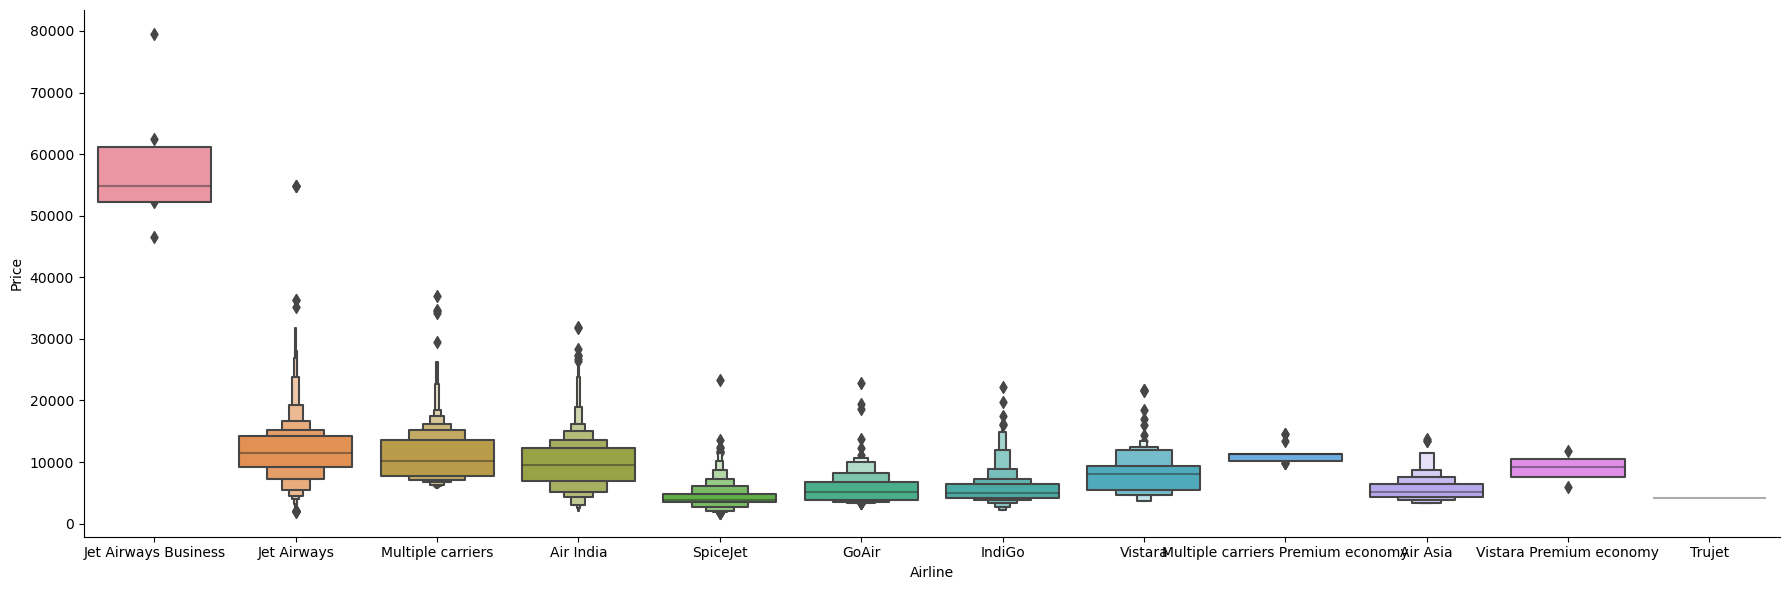

In [ ]:
# plt.figure(figsize=(20,15))

sns.catplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
# plt.figure(figsize=(20,15))
plt.show()

In [ ]:
#Here Airline is the Nominaml data so we do the one-Hot Encoding
Airlines=data[["Airline"]]
Airlines=pd.get_dummies(Airlines,drop_first=True)
Airlines

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

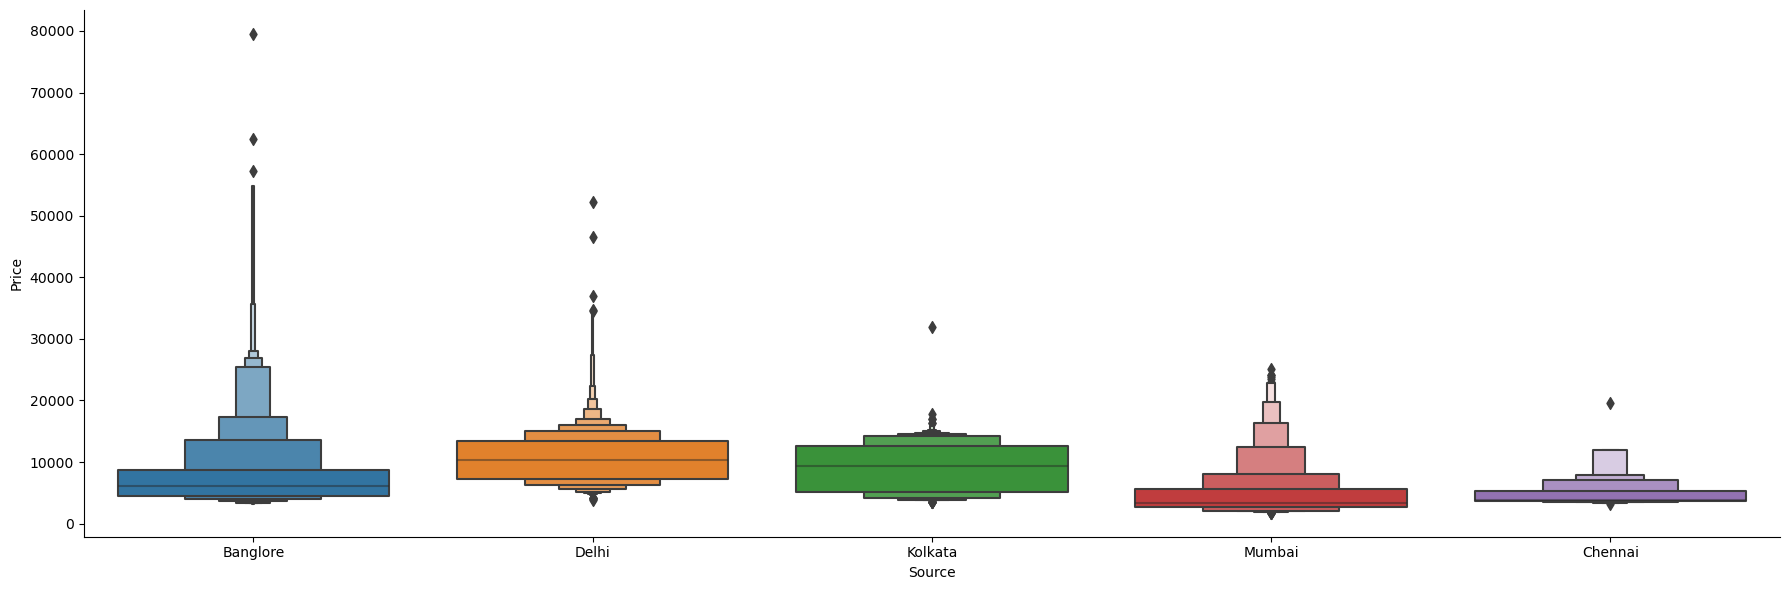

In [ ]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [ ]:
#Here Source is the Nominaml data so we do the one-Hot Encoding
Source=data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [ ]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

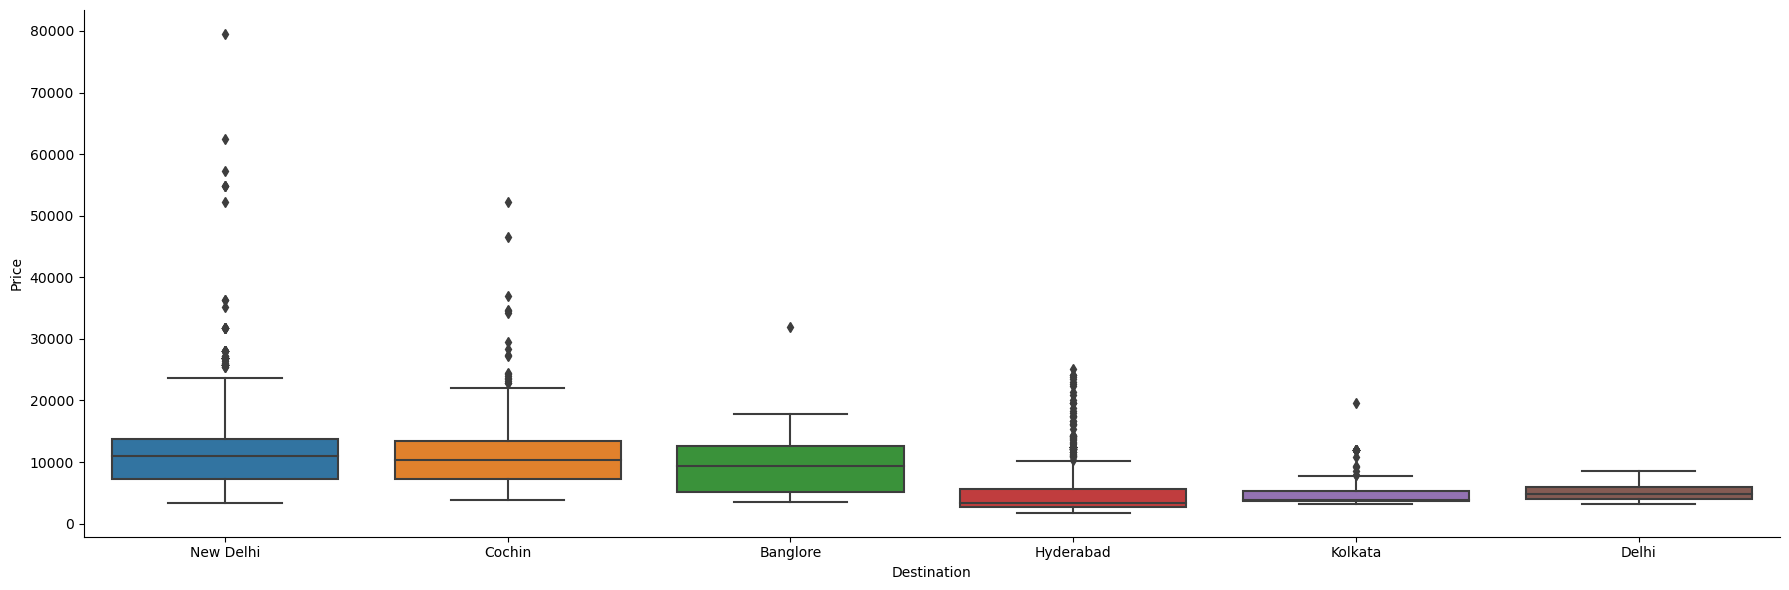

In [ ]:
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False),kind='box',height=6,aspect=3)

In [ ]:
#Here  is the Nominaml data so we do the one-Hot Encoding
Destination=data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
#Here Route and Total_Stops are similar so we drop the Route
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [ ]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,7,25


In [ ]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#Here Total_Stops is in ordinal type of data so we apply Label_Encoding
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [ ]:
data.Total_Stops.value_counts()

1    5625
0    3491
2    1519
3      45
4       1
Name: Total_Stops, dtype: int64

In [ ]:
data.sample(3)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes
2785,Air India,Banglore,Delhi,0,5911,4,12,13,20,16,10,2,50
5529,Air India,Chennai,Kolkata,0,3145,27,3,11,40,13,55,2,15
1212,Air India,Kolkata,Banglore,2,14960,6,12,9,50,23,15,13,25


In [ ]:
data_train=pd.concat([data,Airlines,Source,Destination],axis=1)

In [ ]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [ ]:
data_train.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
data_train.shape

(10681, 30)

# EDA for Test_data

In [ ]:
test_data = pd.read_excel("Test_set.xlsx")

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Preprocessing of Numerical features

In [ ]:
### converting date_of_journey column into datetime format
test_data["Date_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"], infer_datetime_format = True)
### Not extracting years from from date of journey as only one year "2019" data is present
test_data["Journey_Day"] = test_data["Date_of_Journey"].dt.day
test_data["Journey_Month"] = test_data["Date_of_Journey"].dt.month
### dropped Date_of_Journey column
test_data.drop("Date_of_Journey", axis=1,inplace=True)



### extracting dep_hour and dep_minute from departure time columns
test_data["Dep_hour"]= test_data["Dep_Time"].str.split(":").str[0]
test_data["Dep_Minute"] = test_data["Dep_Time"].str.split(":").str[1]
test_data.drop("Dep_Time", axis=1,inplace=True)



### extracting only time from the arrival time columns and removing information about day and month
test_data["Arrival_Time"] = test_data["Arrival_Time"].str.split(" ").str[0]
### extracting arrival_hour and arrival_minute from Arrival_Time column
test_data["Arrival_hour"] = test_data["Arrival_Time"].str.split(":").str[0]
test_data["Arrival_minute"] = test_data["Arrival_Time"].str.split(":").str[1]
test_data.drop("Arrival_Time", axis=1,inplace=True)



### extracting duration_hour and duration_minute from duration column
test_data["Duration_hour"] = test_data["Duration"].str.split(" ").str[0].str.split("h").str[0]
test_data["Duration_minutes"] = test_data["Duration"].str.split(" ").str[1].str.split("m").str[0]
test_data["Duration_minutes"] = test_data["Duration_minutes"].fillna(0)
test_data.drop("Duration", axis=1,inplace=True)


test_data[test_data["Duration_hour"] == "5m"]
test_data.drop(2660, axis = 0, inplace = True)
test_data[test_data["Duration_hour"] == "5m"]


test_data["Dep_hour"]  = test_data["Dep_hour"].astype(int)
test_data["Dep_Minute"]  = test_data["Dep_Minute"].astype(int)
test_data["Arrival_hour"] = test_data["Arrival_hour"].astype(int)
test_data["Arrival_minute"] = test_data["Arrival_minute"].astype(int)
test_data["Duration_minutes"] = test_data["Duration_minutes"].astype(int)
test_data["Duration_hour"] = test_data["Duration_hour"].astype(int)

In [ ]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


# Preprocessing of Categorical data

In [ ]:
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()


Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Source.head()


Destination= test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


test_data.drop(["Route","Additional_Info" ], axis=1, inplace=True)
test_data["Total_Stops"] = test_data["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [ ]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)
data_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [ ]:
data_test

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,3,6,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,3,6,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Feature selection

In [ ]:
data_train.shape

(10681, 30)

In [ ]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hour',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
X = data_train.loc[:, ['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_Hour', 'Arrival_minutes', 'Duration_hour',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minutes,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=data_train.iloc[:,1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

<Axes: >

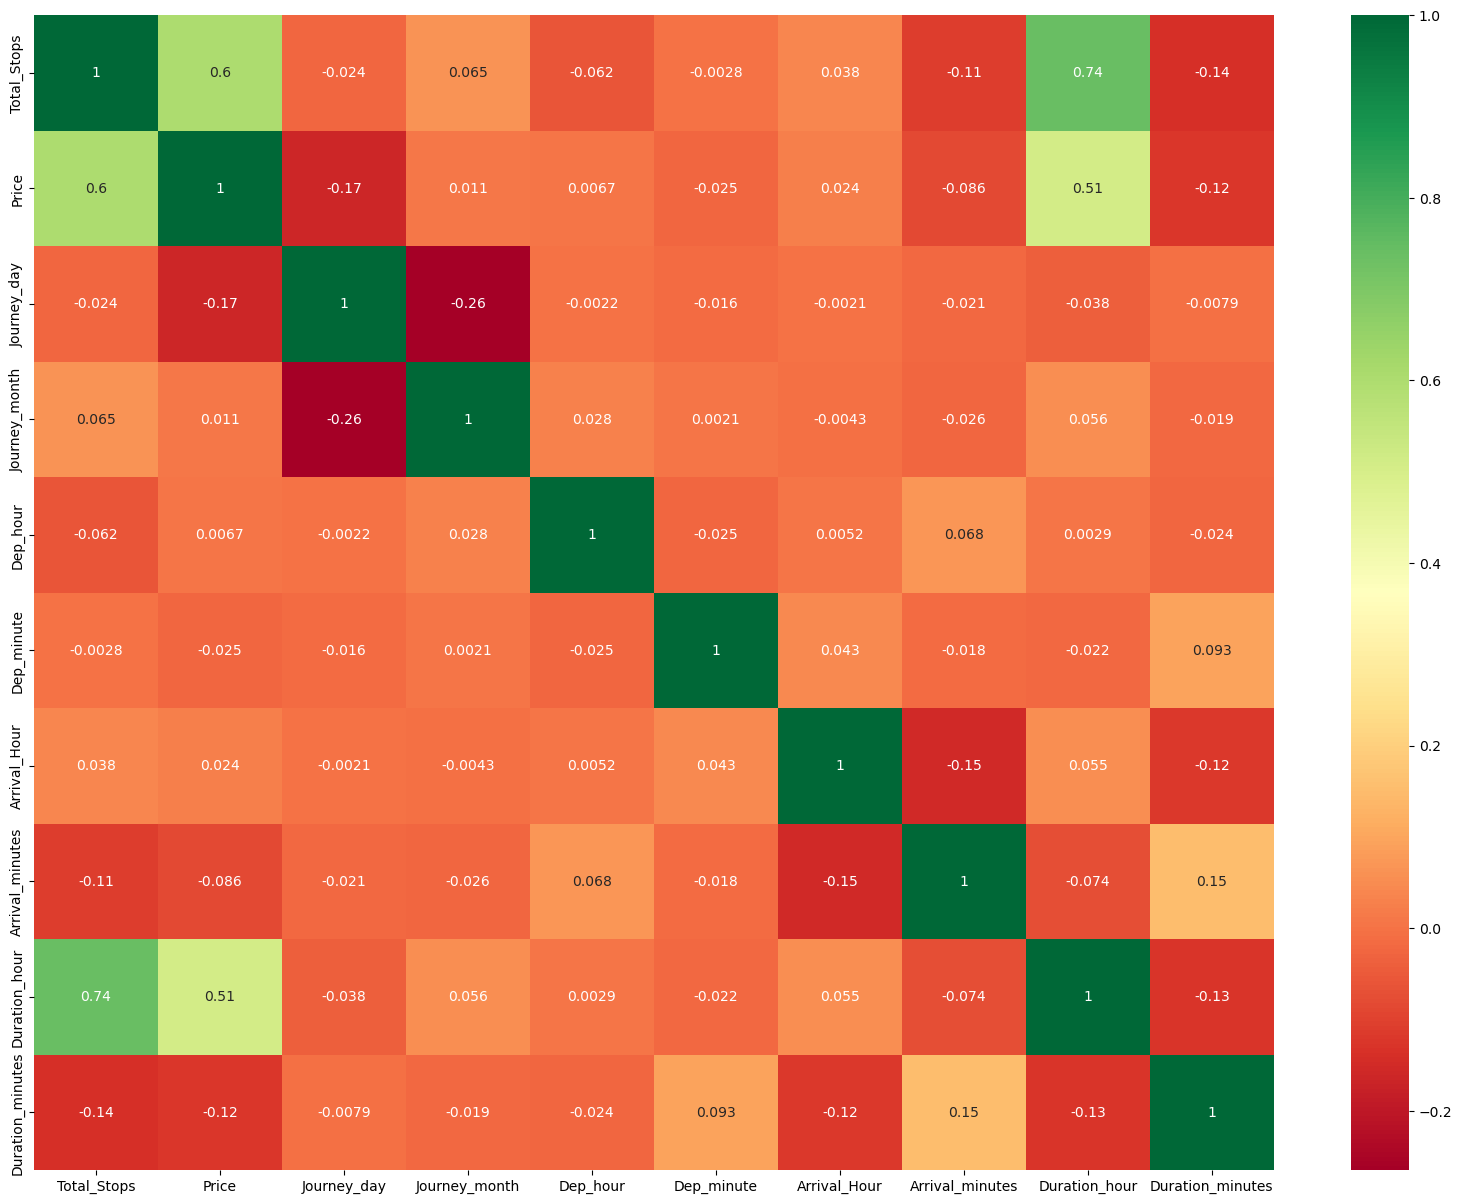

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [ ]:
selection.feature_importances_

array([2.20818166e-01, 1.09140930e-01, 8.52411875e-02, 2.50611266e-02,
       2.22751350e-02, 2.89272265e-02, 2.09478451e-02, 1.32187929e-01,
       1.74280457e-02, 9.37363903e-03, 1.76314679e-03, 1.87042863e-02,
       1.37215214e-01, 6.67460112e-02, 1.99087799e-02, 9.77043994e-04,
       2.98537505e-03, 1.03999957e-04, 4.92423022e-03, 1.23599207e-04,
       5.68247901e-04, 1.20241480e-02, 4.44261626e-03, 6.57324678e-03,
       8.24320603e-03, 1.40651114e-02, 6.21047897e-03, 4.68634559e-04,
       2.25513927e-02])

In [ ]:
selection_feature=pd.Series(selection.feature_importances_, index=X.columns)
selection_feature

Total_Stops                                  0.220818
Journey_day                                  0.109141
Journey_month                                0.085241
Dep_hour                                     0.025061
Dep_minute                                   0.022275
Arrival_Hour                                 0.028927
Arrival_minutes                              0.020948
Duration_hour                                0.132188
Duration_minutes                             0.017428
Airline_Air India                            0.009374
Airline_GoAir                                0.001763
Airline_IndiGo                               0.018704
Airline_Jet Airways                          0.137215
Airline_Jet Airways Business                 0.066746
Airline_Multiple carriers                    0.019909
Airline_Multiple carriers Premium economy    0.000977
Airline_SpiceJet                             0.002985
Airline_Trujet                               0.000104
Airline_Vistara             

<Axes: >

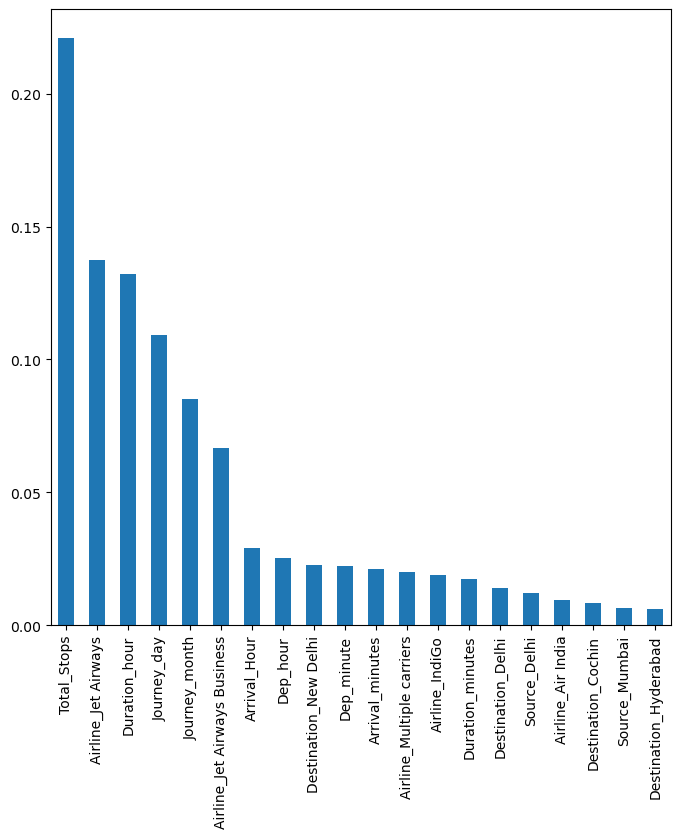

In [ ]:
plt.figure(figsize=(8,8))
selection_feature.nlargest(20).plot(kind="bar")

# Fitting model using Random Forest

In [ ]:
# Importing Libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_train_pred=model.predict(X_train)

In [ ]:
y_test_pred=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.9531751567492972

In [ ]:
model.score(X_test,y_test)

0.7942442390983284

<Axes: xlabel='Price', ylabel='Density'>

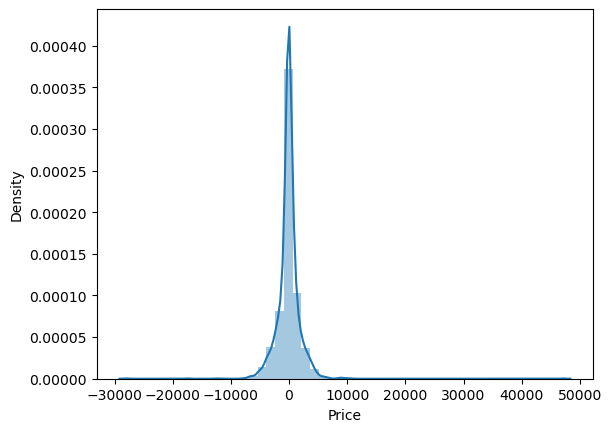

In [ ]:
sns.distplot(y_test-y_test_pred)

Text(0, 0.5, 'y_test_pred')

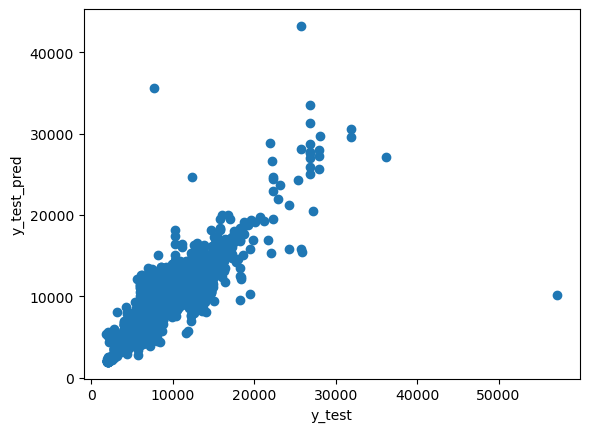

In [ ]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [ ]:
from sklearn import metrics

In [ ]:
print('MSE :',metrics.mean_squared_error(y_test,y_test_pred))
print('MAE :',metrics.mean_absolute_error(y_test,y_test_pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MSE : 4249500.792788311
MAE : 1133.6900847477536
RMSE : 2061.431733720113


In [ ]:
metrics.r2_score(y_test,y_test_pred)

0.7942442390983284

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#  RandomizedSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop = 100, num = 12 )]
#no of features to consider at everysplit
max_features = ['auto', 'sqrt']
#Maximum no of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#minimum no of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,}

In [ ]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [ ]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
prediction = rf_random.predict(X_test)

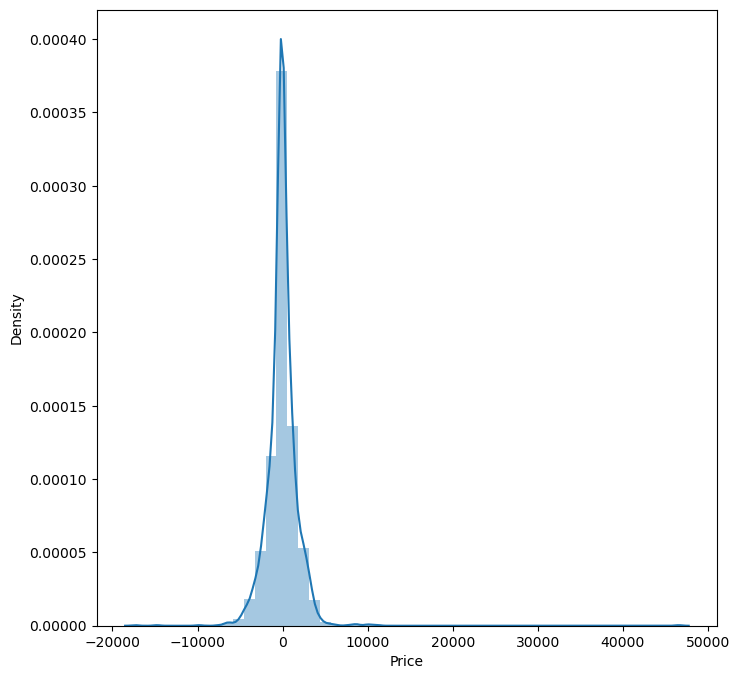

In [ ]:
plt.figure(figsize= (8,8))
sns.distplot(y_test-prediction)
plt.show()

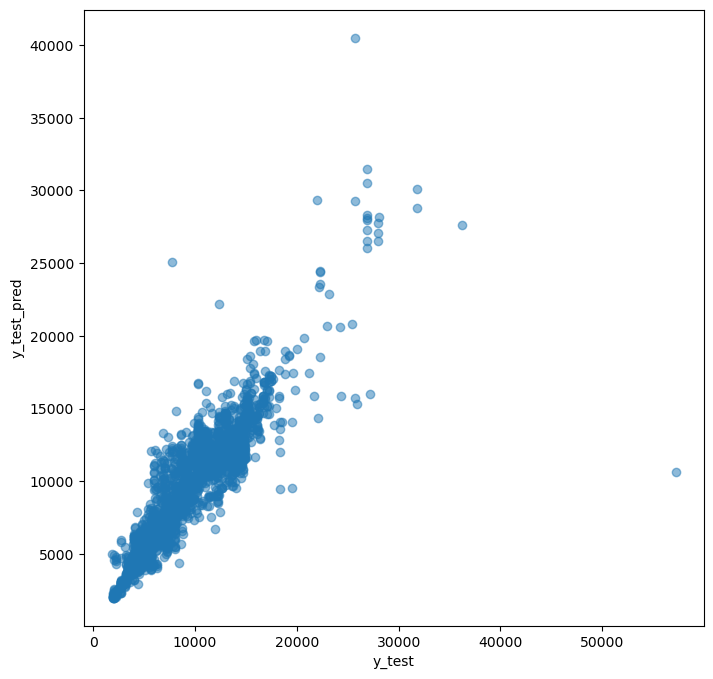

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

MAE: 1115.1258491308504
MSE: 3637922.3663412114
RMSE: 33.393500103026796


# Saving File

In [ ]:
import pickle

In [ ]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [ ]:
model = open('flight_rf.pkl','rb' )
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.823856137206036